## Initial Data Ingestion & Exploration

In [107]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle

In [2]:
#reading the data from text file
data = pd.read_csv('ds_practical.txt', sep="|")


In [3]:
data.head()

,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age
0,1,0,CA,0,N,0,M,Female,$175k-199k,0,43.0
1,2,0,CA,0,N,0,U,Male,$225k-249k,0,90.0
2,3,1,CA,0,Y,1,S,Female,$150k-174k,0,46.0
3,4,0,CA,1,N,0,U,Female,$125k-149k,0,25.0
4,5,0,CA,0,N,0,U,Female,$175k-199k,0,62.0


In [4]:
#Checking for missing values across the variables
data.info()

# Implies missing values for state and age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   anon_person_id                1000000 non-null  int64  
 1   target                        1000000 non-null  int64  
 2   state                         989976 non-null   object 
 3   presence_of_child_ind         1000000 non-null  int64  
 4   streaming_media_subs          1000000 non-null  object 
 5   streaming_entertainment_subs  1000000 non-null  int64  
 6   marital_status                1000000 non-null  object 
 7   gender                        1000000 non-null  object 
 8   income                        1000000 non-null  object 
 9   number_of_news_subs           1000000 non-null  int64  
 10  age                           980298 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 83.9+ MB


In [5]:
#getting the stats across the columns
data.describe(include='all')


,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age
count,1000000.000000,1000000.000000,989976,1000000.000000,1000000,1000000.000000,1000000,1000000,1000000,1000000.000000,980298.000000
unique,NaN,NaN,3,NaN,2,NaN,3,3,12,NaN,NaN
top,NaN,NaN,CA,NaN,N,NaN,U,Male,$200k-224k,NaN,NaN
freq,NaN,NaN,977083,NaN,826310,NaN,659912,574615,230618,NaN,NaN
mean,499500.750000,0.149743,NaN,0.144680,NaN,0.173690,NaN,NaN,NaN,0.205013,46.851937
std,288674.846352,0.356820,NaN,0.351778,NaN,0.378843,NaN,NaN,NaN,0.771099,15.018724
min,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,19.000000
25%,249500.750000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,40.000000
50%,499500.500000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,45.000000
75%,749500.250000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,51.000000


In [6]:
data.nunique(dropna=False)

anon_person_id                  999500
target                               2
state                                4
presence_of_child_ind                2
streaming_media_subs                 2
streaming_entertainment_subs         2
marital_status                       3
gender                               3
income                              12
number_of_news_subs                  9
age                                 82
dtype: int64

In [7]:
# some observations on the data from the stats
#anon_person_id should be unique. But, seems like they range from 1 to 999,500 only in the 
#million records indicating duplicates
#~15% of the respondents are podcast listeners
# For states CA is the most repeated value
# More than 82% of the respondends do not have any media streaming subscriptions
#~66% of the respondents marital status 'Unknown'. Hence, it does not make sense to use this variable for a concrete analysis
#57.5% of respondents are male
#Respondents ages range rom 19 to 99
#number of news subscriptions ranges from 0 to 8

In [8]:
#Let's drop the duplicate anon_person_id
data=data.drop_duplicates(subset=['anon_person_id'])

In [9]:
data.target.value_counts()

0    849834
1    149666
Name: target, dtype: int64

In [10]:
data.marital_status.value_counts()

U    659594
M    290444
S     49462
Name: marital_status, dtype: int64

In [11]:
data.gender.value_counts()

Male       574328
Female     345986
feMalee     79186
Name: gender, dtype: int64

In [12]:
#Some of the gender values have a typo. Let's correct it
data.loc[data['gender'] == 'feMalee', 'gender'] = 'Female'
data.gender.value_counts()

Male      574328
Female    425172
Name: gender, dtype: int64

In [13]:
data.streaming_media_subs.value_counts()

N    825891
Y    173609
Name: streaming_media_subs, dtype: int64

In [14]:
data.streaming_entertainment_subs.value_counts()

0    825891
1    173609
Name: streaming_entertainment_subs, dtype: int64

In [15]:
#the streaming_media_subs and streaming_entertainment_subs seem to have same values. let's check
data[(data['streaming_media_subs']=='Y') & (data['streaming_entertainment_subs']==0)].shape

(0, 11)

In [16]:
#number of rows with conflicting values for streaming_media_subs and streaming_entertainment_subs is 0.
#So, we will eliminate streaming_media_subs from our analysis

In [17]:
data.number_of_news_subs.value_counts()

0    919312
2     25336
3     21657
1     16509
4     11717
5      4018
6       850
7        95
8         6
Name: number_of_news_subs, dtype: int64

In [18]:
data.presence_of_child_ind.value_counts()

0    854883
1    144617
Name: presence_of_child_ind, dtype: int64

In [19]:
data.state.value_counts()

CA    976587
GA     10831
DC      2058
Name: state, dtype: int64

In [20]:
#Impute the missing values for state with most frequent value
most_frequent_category=data['state'].mode()[0]
data['state'].fillna(most_frequent_category,inplace=True)

In [21]:
data.income.value_counts()

$200k-224k    230501
$175k-199k    211354
$225k-249k    173785
$150k-174k    145531
$125k-149k     82226
$250k+         80029
$100k-124k     38702
U              16945
$75k-99k       15003
$50k-74k        4506
$25k-49k         839
<$25k             79
Name: income, dtype: int64

In [22]:
data.income.value_counts()

$200k-224k    230501
$175k-199k    211354
$225k-249k    173785
$150k-174k    145531
$125k-149k     82226
$250k+         80029
$100k-124k     38702
U              16945
$75k-99k       15003
$50k-74k        4506
$25k-49k         839
<$25k             79
Name: income, dtype: int64

In [23]:
#Impute the unknown values for income with most frequent value
most_frequent_category=data['income'].mode()[0]
data.loc[data['income']=='U','income']=most_frequent_category

In [24]:
#lets label encode the income with ordinality
from sklearn import preprocessing
le = preprocessing.OrdinalEncoder()
cats={'<$25k':0,'$25k-49k':1,'$50k-74k':2,'$75k-99k':3,'$100k-124k':4,'$125k-149k':5,'$150k-174k':6,'$175k-199k':7,
     '$200k-224k':8,'$225k-249k':9,'$250k+':10}

data['income']=data.income.map(cats)

In [25]:
data.age.value_counts()

45.0    277748
44.0     22169
46.0     21826
43.0     21446
47.0     20814
         ...  
95.0      1529
96.0      1396
97.0      1328
98.0      1189
99.0      1142
Name: age, Length: 81, dtype: int64

In [26]:
#Impute the missing values for age with most frequent value
most_frequent_category=data['age'].mode()[0]
data['age'].fillna(most_frequent_category,inplace=True)

(array([ 49879.,  52639.,  56368.,  67935.,  96034., 381986.,  77413.,
         49195.,  38571.,  32296.,  27176.,  21821.,  17303.,  13015.,
          9648.,   8221.]),
 array([19., 24., 29., 34., 39., 44., 49., 54., 59., 64., 69., 74., 79.,
        84., 89., 94., 99.]),
 <BarContainer object of 16 artists>)

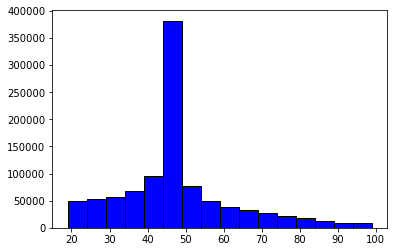

In [27]:
#checking the histogram for age
import matplotlib.pyplot as plt
plt.hist(data['age'],color = 'blue', edgecolor = 'black',
         bins = int(81/5))

In [28]:
#For ease of analysis, lets bin and label encode the age with ordinality
data['age']=pd.cut(data['age'],16,labels=np.arange(16))

In [29]:
#one hot encode categorical columns
datam=pd.concat([data,pd.get_dummies(data['state'],prefix='state',drop_first=False)],axis=1)
datam=pd.concat([datam,pd.get_dummies(data['gender'],prefix='gender',drop_first=False)],axis=1)
datam.head()

,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age,state_CA,state_DC,state_GA,gender_Female,gender_Male
0,1,0,CA,0,N,0,M,Female,7,0,4,1,0,0,1,0
1,2,0,CA,0,N,0,U,Male,9,0,14,1,0,0,0,1
2,3,1,CA,0,Y,1,S,Female,6,0,5,1,0,0,1,0
3,4,0,CA,1,N,0,U,Female,5,0,1,1,0,0,1,0
4,5,0,CA,0,N,0,U,Female,7,0,8,1,0,0,1,0


In [30]:
#drop unneeded columns
datam.drop(columns=['anon_person_id','state','streaming_media_subs','marital_status','gender'],inplace=True)
datam.head()

,target,presence_of_child_ind,streaming_entertainment_subs,income,number_of_news_subs,age,state_CA,state_DC,state_GA,gender_Female,gender_Male
0,0,0,0,7,0,4,1,0,0,1,0
1,0,0,0,9,0,14,1,0,0,0,1
2,1,0,1,6,0,5,1,0,0,1,0
3,0,1,0,5,0,1,1,0,0,1,0
4,0,0,0,7,0,8,1,0,0,1,0


# Feature Inter-relations

In [31]:
#Since we have discrete values let's check the chi-square stats
from scipy.stats import chi2_contingency
lstV=[]
lstP=[]
for col in datam.columns:
    for colA in datam.columns:
        CrosstabResult=pd.crosstab(index=datam[col],columns=datam[colA])
        # Performing Chi-sq test
        ChiSqResult = chi2_contingency(CrosstabResult,correction=False)
        n=np.sum(np.sum(CrosstabResult)) 
        minDim = min(CrosstabResult.shape)-1
        
        #calculate Cramer's V 
        V = np.sqrt((ChiSqResult[0]/n) / minDim)
        resultV=[col,colA,round(V,2)]
        resultP=[col,colA,round(ChiSqResult[1],2)]
        
        lstV.append(resultV)
        lstP.append(resultP)
        
dfP=pd.DataFrame(lstP)
dfV=pd.DataFrame(lstV)
print(pd.crosstab(index=dfP.iloc[:,0], columns=dfP.iloc[:,1], 
                  values=dfP.iloc[:,2], aggfunc='sum'))


1                             age  gender_Female  gender_Male  income  \
0                                                                       
age                           0.0            0.0          0.0     0.0   
gender_Female                 0.0            0.0          0.0     0.0   
gender_Male                   0.0            0.0          0.0     0.0   
income                        0.0            0.0          0.0     0.0   
number_of_news_subs           0.0            0.0          0.0     0.0   
presence_of_child_ind         0.0            0.0          0.0     0.0   
state_CA                      0.0            0.0          0.0     0.0   
state_DC                      0.0            0.0          0.0     0.0   
state_GA                      0.0            0.0          0.0     0.0   
streaming_entertainment_subs  0.0            0.0          0.0     0.0   
target                        0.0            0.0          0.0     0.0   

1                             number_of_news_subs 

<AxesSubplot:xlabel='1', ylabel='0'>

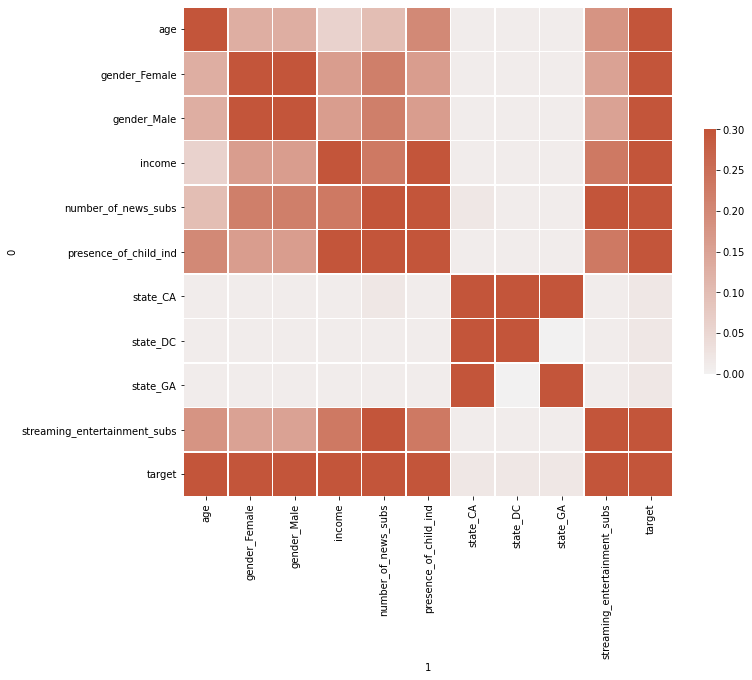

In [32]:
import seaborn as sns
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap for cramers V
sns.heatmap(pd.crosstab(index=dfV.iloc[:,0], columns=dfV.iloc[:,1], 
                  values=dfV.iloc[:,2], aggfunc='sum'),cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
#chi-square stats implies some of level dependency across the dependent variables (except state) and independent variable

Ratio of podcast listners across  presence_of_child_ind


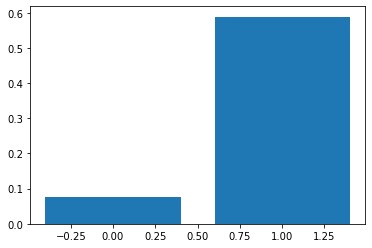

Ratio of podcast listners across  streaming_entertainment_subs


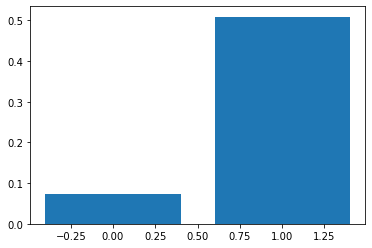

Ratio of podcast listners across  income


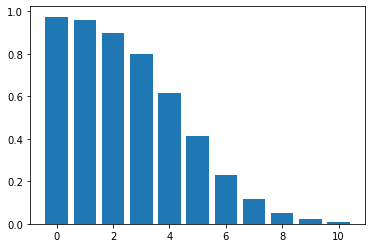

Ratio of podcast listners across  number_of_news_subs


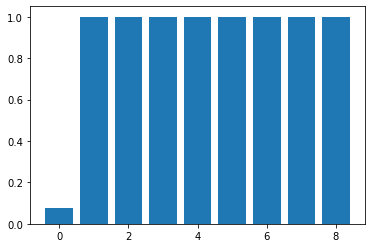

Ratio of podcast listners across  age


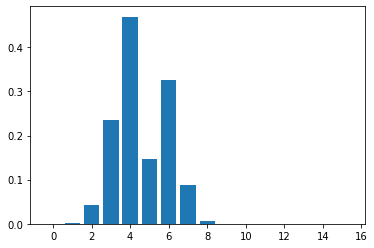

Ratio of podcast listners across  state_CA


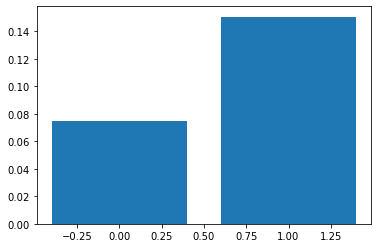

Ratio of podcast listners across  state_DC


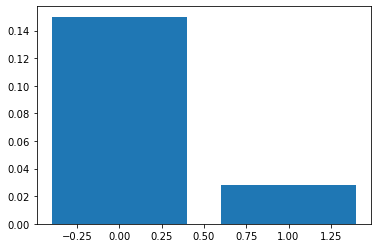

Ratio of podcast listners across  state_GA


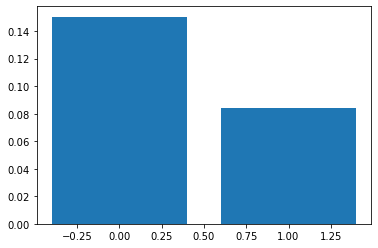

Ratio of podcast listners across  gender_Female


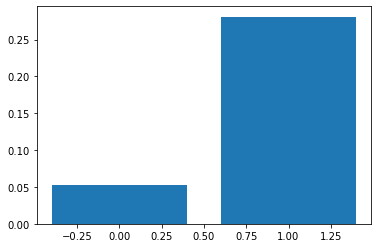

Ratio of podcast listners across  gender_Male


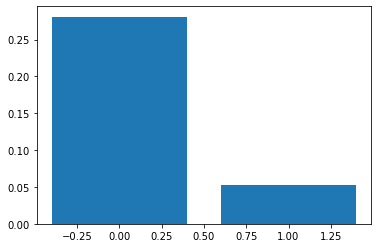

In [34]:
#checking for variability in target value for different values of independent variables
for col in datam.columns:
    if col!='target':
        print('Ratio of podcast listners across ',col)
        plt.figure()
        plt.bar(datam.groupby(col).mean()['target'].index,datam.groupby(col).mean()['target'])
        plt.show()

In [35]:
#Some observations from above plots:
#users with children have 6x probability of listening to podcasts than those without children
#users with streaming entertainment subscriptions have 5x probability of listening to podcasts than those without subscription
#Probability of listening to podcasts decreases with income increase
#users with at least 1 news subsriptions listen to podcasts with 100% certainity
#users below the age of 29 and above 60 have almost 0 probability of listenting to podcasts
#Female users have 5x probability of listening to podcasts than male users

In [36]:
##function to compute weight of evidence and information value. 

def iv_woe(data, target):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        
    return newDF, woeDF

In [37]:
iv, woe = iv_woe(data = datam, target = 'target')

#IV for states is less than 0.02 which implies that we can remove the state columns without effect on any regression analysis

Information value of presence_of_child_ind is 1.429035
Information value of streaming_entertainment_subs is 1.253752
Information value of income is 1.828374
Information value of number_of_news_subs is 6.942812
Information value of age is 2.835916
Information value of state_CA is 0.005896
Information value of state_DC is 0.00355
Information value of state_GA is 0.003669
Information value of gender_Female is 0.855829
Information value of gender_Male is 0.855829


# Machine Learning Model

In [114]:
#buiilding a pipeline for ML classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import xgboost as xgb


# Construct some pipelines
#focussing on only 3 different models most relevant to classification in this case
pipe_lr = Pipeline([
('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([
('clf', RandomForestClassifier(random_state=42))])



pipe_xgb = Pipeline([
('clf', xgb.XGBClassifier(use_label_encoder=False,random_state=42))])



# Set grid search params
# Considering the small number of independent variables parameter tuning is kept to a minimum
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
'clf__C': param_range_fl,
'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
'clf__n_estimators': [10, 20, 30]}]

grid_params_xgb = [{'clf__n_estimators': [10, 20, 30],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3]}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
param_grid=grid_params_lr,
scoring='accuracy',
cv=10) 



gs_rf = GridSearchCV(estimator=pipe_rf,
param_grid=grid_params_rf,
scoring='accuracy',
cv=10, 
n_jobs=jobs)


gs_xgb = GridSearchCV(estimator=pipe_xgb,
param_grid=grid_params_xgb,
scoring='accuracy',
cv=10,
n_jobs=jobs)


# List of pipelines for ease of iteration
grids = [gs_lr,gs_rf,gs_xgb]

#, gs_rf, gs_rf_pca, gs_xgb, gs_xgb_pca
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest', 2: 'XGBoost'}



In [115]:
#function to run the pipelines, find the best model and compute corresponding scores
def run_model(df_m,data_name):
    lst=[]
    df_m=df_m.apply(pd.to_numeric)
    X=df_m.loc[:,df_m.columns!='target']
    y= df_m['target']
    # split data
    train_data,test_data = train_test_split(df_m,train_size=0.8,random_state=0)
    # select the columns and 
    # prepare data for the models 
    X_train = train_data.loc[:,train_data.columns!='target']
    y_train = train_data['target']
    X_test = test_data.loc[:,test_data.columns!='target']
    y_test = test_data['target']
    # Fit the grid search objects
    print('Performing model optimizations...')
    best_acc = 0.0
    best_clf = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        start=dt.datetime.now()
        print(idx)
        # Fit grid search      
        gs.fit(X_train, y_train)

        # Predict on test data with best params
        y_pred = gs.predict(X_test)
        
        if grid_dict[idx]=='Logistic Regression':
            res=[grid_dict[idx],gs.best_params_,gs.best_score_,accuracy_score(y_test, y_pred),
             precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),
            f1_score(y_test, y_pred, average='weighted'),roc_auc_score(y_test, y_pred),
            gs.best_estimator_.named_steps["clf"].coef_[0]]
        else:
            res=[grid_dict[idx],gs.best_params_,gs.best_score_,accuracy_score(y_test, y_pred),
             precision_score(y_test, y_pred, average='weighted'),recall_score(y_test, y_pred, average='weighted'),
            f1_score(y_test, y_pred, average='weighted'),roc_auc_score(y_test, y_pred),
            gs.best_estimator_.named_steps["clf"].feature_importances_]
        lst.append(res)
        
        filename = grid_dict[idx] + "_"+data_name +".sav"
        pickle.dump(gs.best_estimator_, open(filename, 'wb'))
        # Track best (highest test accuracy) model
        if accuracy_score(y_test, y_pred) > best_acc:
            best_acc = accuracy_score(y_test, y_pred)
            best_gs = gs
            best_clf = idx
        print('Elapsed time: ',str(dt.datetime.now()-start))
    df_res=pd.DataFrame(lst,columns=['Estimator','Best Params','Training Accuracy','Test Accuracy',
                                'Precision','Recall','f1','AUC','Feature Importance'])
    print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])
    return df_res,best_acc,best_gs,best_clf





In [116]:
#Building a model on data excluding state information
datamA=datam.drop(columns=['state_GA','state_CA','state_DC','gender_Male'])
datamA=datamA.apply(pd.to_numeric)
df_resA,best_accA,best_gsA,best_clfA=run_model(datamA,"datamA")

Performing model optimizations...
0
Elapsed time:  0:04:40.612687
1
Elapsed time:  0:09:32.789275
2
[16:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Elapsed time:  0:09:44.601498

Classifier with best test set accuracy: Random Forest


In [117]:
#results from the pipeline run on data excluding state information
df_resA

,Estimator,Best Params,Training Accuracy,Test Accuracy,Precision,Recall,f1,AUC,Feature Importance
0,Logistic Regression,"{'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__so...",0.942419,0.941816,0.940117,0.941816,0.938603,0.838668,"[-1.878446256660003, 2.5689070343959157, -0.65..."
1,Random Forest,"{'clf__criterion': 'gini', 'clf__n_estimators'...",0.950388,0.949990,0.948531,0.949990,0.948189,0.869622,"[0.1276332514407495, 0.17274735951823475, 0.10..."
2,XGBoost,"{'clf__learning_rate': 0.3, 'clf__n_estimators...",0.950243,0.949755,0.948469,0.949755,0.947569,0.863160,"[0.0066501587, 0.06590123, 0.010798372, 0.8659..."


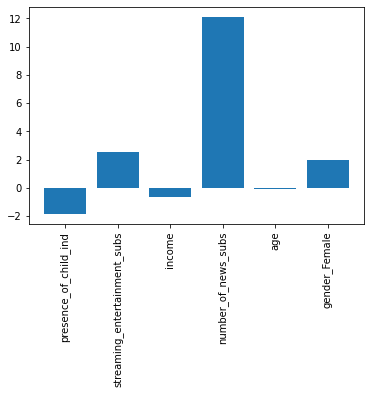

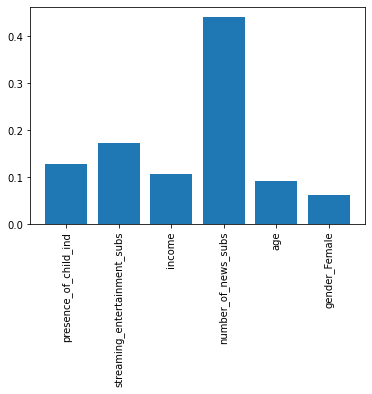

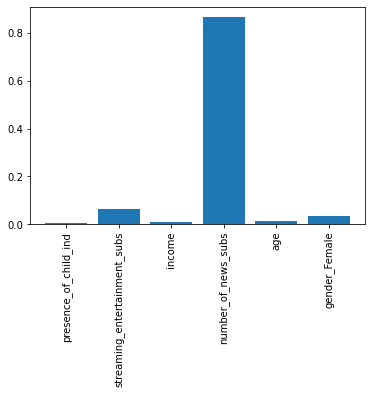

In [118]:
#plotting the feature importance from different classifiers
for score in df_resA['Feature Importance']:
    cols=datamA.columns
    # plot feature importance
    plt.figure()
    plt.bar([x for x in cols[~cols.isin(['target'])]], score)
    plt.xticks(rotation='vertical')
    plt.show()
    

In [43]:
#Observations from feature importance plots
#Logistic
    #number_of_news_subs - increase in the variable by 1 increase the odds ratio by ~18k
    #gender_female- being female increases the odds ratio by 7x
    #presence of children decreases odds ratio by 0.15x
    #presence of streaming_entertainment_subs increases odds ratio by 13x

#RandomForest
    # number_of_news_subs accounts for 44% of propensity to 'Listening to podcasts' 
    # 'streaming_entertainment_subs' accounts for 17% of propensity to 'Listening to podcasts'
    # 'presence_of_child_ind' accounts for 12% of propensity to 'Listening to podcasts'
    # 'income' accounts for 11% of propensity to 'Listening to podcasts'

#XGBoost
    # number_of_news_subs accounts for 86% of propensity to 'Listening to podcasts' 
    # 'streaming_entertainment_subs' accounts for 7% of propensity to 'Listening to podcasts'
    # 'presence_of_child_ind' accounts for <1% of propensity to 'Listening to podcasts' 
   
    

In [119]:
# building ML models on data excluding state data and 'number of new subs' data.
# understanding the relationships between target and 'features excluding number_of_news_subs'
#as probability(target==1/number_of_news_subs>1)=1
datamB=datam.drop(columns=['number_of_news_subs','state_GA','state_CA','state_DC','gender_Male'])
datamB=datamB.apply(pd.to_numeric)
df_resB,best_accB,best_gsB,best_clfB=run_model(datamB,"datamb")

Performing model optimizations...
0
Elapsed time:  0:04:24.639165
1
Elapsed time:  0:07:48.956082
2
[16:45:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Elapsed time:  0:06:54.246335

Classifier with best test set accuracy: Random Forest


In [120]:
df_resB

,Estimator,Best Params,Training Accuracy,Test Accuracy,Precision,Recall,f1,AUC,Feature Importance
0,Logistic Regression,"{'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__so...",0.914085,0.913457,0.909541,0.913457,0.910841,0.802952,"[1.1718192503163005, 2.5667346501224313, -0.58..."
1,Random Forest,"{'clf__criterion': 'gini', 'clf__n_estimators'...",0.933222,0.932341,0.929561,0.932341,0.930104,0.837527,"[0.3102724359135193, 0.24725734179047384, 0.15..."
2,XGBoost,"{'clf__learning_rate': 0.3, 'clf__n_estimators...",0.933182,0.932331,0.929551,0.932331,0.930095,0.837521,"[0.6692864, 0.16475548, 0.035556052, 0.039699,..."


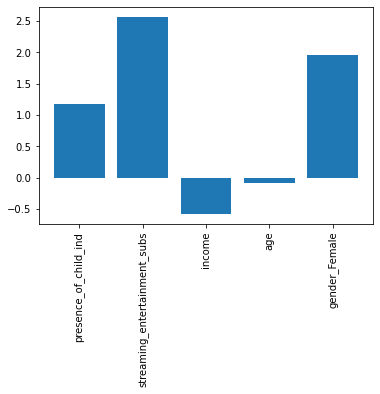

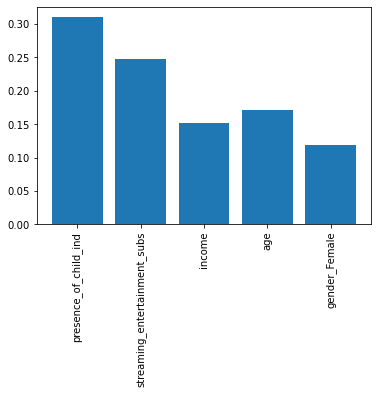

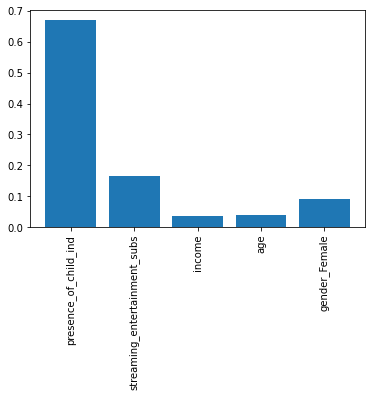

In [121]:
#plotting the feature importance from different classifiers
for score in df_resB['Feature Importance']:
    cols=datamB.columns
    # plot feature importance
    plt.figure()
    plt.bar([x for x in cols[~cols.isin(['target'])]], score)
    plt.xticks(rotation='vertical')
    plt.show()

In [122]:
#Obsertvations from feature importance plots assuming 'number_of_news_subs ' is not available
#Logistic
    #streaming_entertainment_subs - increase in the variable by 1 increase the odds ratio by 2.57x
    #gender_female- being female increases the odds ratio by 1.96x
    #presence of children increases odds ratio by 1.17
 
#RandomForest
    # presence_of_child_ind accounts for 31% of propensity to 'Listening to podcasts' 
    # 'streaming_entertainment_subs' accounts for 25% of propensity to 'Listening to podcasts'
    # 'age' accounts for 17% of propensity to 'Listening to podcasts'
    # 'income' accounts for 11% of propensity to 'Listening to podcasts'

#XGBoost
    # presence_of_child_ind accounts for 67% of propensity to 'Listening to podcasts' 
    # 'streaming_entertainment_subs' accounts for 16% of propensity to 'Listening to podcasts'
    # gender_Female accounts for 9% of propensity to 'Listening to podcasts'
   

# Final Output Building

In [123]:
#Checking the params for the best model from ML section
df_resA['Best Params'][1]

{'clf__criterion': 'gini', 'clf__n_estimators': 20}

In [124]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

In [125]:
X=datamA.loc[:,datamA.columns!='target']
y= datamA['target']
# split data
train_data,test_data = train_test_split(datamA,train_size=0.8,random_state=0)
# select the columns and 
# prepare data for the models 
X_train = train_data.loc[:,train_data.columns!='target']
y_train = train_data['target']
X_test = test_data.loc[:,test_data.columns!='target']
y_test = test_data['target']

In [126]:
#Re-running the best model on the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
start=dt.datetime.now()
rf = RandomForestClassifier(n_estimators=20, random_state=42,criterion='gini')
rf.fit(X_train,y_train)
rf_accuracy=rf.score(X_test,y_test)
test_pred = rf.predict(X_test)
train_pred = rf.predict(X_train)
score5 = cross_val(rf)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:02:17.972373


In [127]:
pred_rf = rf.predict_proba(X_test)[:,1]
fpr_rf,tpr_rf,_ = roc_curve(y_test.values,pred_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)


In [128]:
results_df = pd.DataFrame(data=[["Random Forest",  rf_accuracy , roc_auc_rf, score5]], 
                            columns=['Model','Accuracy', 'AUC', "Cross Validation"])

results_df

,Model,Accuracy,AUC,Cross Validation
0,Random Forest,0.94999,0.970641,0.950285


In [129]:
#Function for drawing the confusion matrix map
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[836901  12933]
 [ 36712 112954]]
Normalized confusion matrix
[[0.98 0.02]
 [0.25 0.75]]


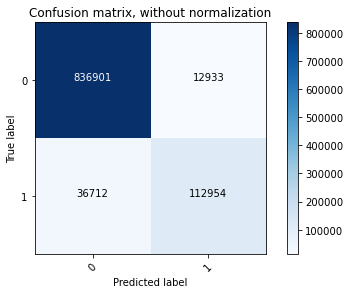

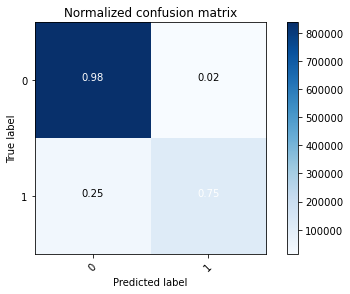

In [130]:
#Predicting the values using the model
class_names=[0,1]
y_pred=rf.predict(X)
y_pred_prob=rf.predict_proba(X)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [131]:
X['Prediction']=y_pred
X['Probability']=y_pred_prob[:,1]


In [ ]:
datatemp=data.join(X[['Prediction','Probability']])

In [ ]:
#writing final output to CSV file
datatemp[['anon_person_id','target','Prediction','Probability']].to_csv('Scores.csv', index=False)
           

# Some additional analysis for the business

In [153]:
agg_func_math = {
    'target':
    ['count', 'mean']
}

In [170]:
datamA1=datamA.copy()

In [160]:
datamA1['New_Sub']=datamA1['number_of_news_subs'].apply(lambda x:0 if x==0 else 1)

In [171]:
datamA1['age_n']=datamA1['age'].apply(lambda x:1 if 4<=x<=6 else 0)

In [172]:
datamA1['income_n']=datamA1['income'].apply(lambda x:1 if x<=6 else 0)

In [176]:
datamA1.groupby(['presence_of_child_ind',
        'streaming_entertainment_subs','New_Sub']).agg(agg_func_math).reset_index()

presence_of_child_ind streaming_entertainment_subs New_Sub  target          
                                                               count      mean
0                     0                            0       0  737328  0.035621
1                     0                            1       0  117555  0.325448
2                     1                            0       0   55596  0.037539
3                     1                            0       1   32967  1.000000
4                     1                            1       0    8833  0.324805
5                     1                            1       1   47221  1.000000

In [177]:
datamA1.groupby(['age_n','income_n','gender_Female']).agg(agg_func_math).reset_index()

age_n income_n gender_Female  target          
                                 count      mean
0     0        0             0  216340  0.006115
1     0        0             1  126151  0.042465
2     0        1             0   60796  0.058343
3     0        1             1   46081  0.296955
4     1        0             0  221986  0.031646
5     1        0             1  148137  0.186679
6     1        1             0   75206  0.243398
7     1        1             1  104803  0.694360